## Student details

- Name: Tanaka Mambinge
- Reg number: R223585Q
- Programme: HDS

## Importing libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# creating data dict
data = {
    "year": [2010, 2011, 2012, 2010, 2011, 2012, 2010, 2011, 2012],
    "team": [
        "FCBarcelona",
        "FCBarcelona",
        "FCBarcelona",
        "RMadrid",
        "RMadrid",
        "RMadrid",
        "ValenciaCF",
        "ValenciaCF",
        "ValenciaCF",
    ],
    "wins": [30, 28, 32, 29, 32, 26, 21, 17, 19],
    "draws": [6, 7, 4, 5, 4, 7, 8, 10, 8],
    "losses": [2, 3, 2, 4, 2, 5, 9, 11, 11],
}

In [4]:
# creating df
football = pd.DataFrame(data, columns=["year", "team", "wins", "draws", "losses"])

In [5]:
# displaying first 5 records of df
football.head()

,year,team,wins,draws,losses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2


## Open Government Data Analysis

In [43]:
# reading csv file
edu = pd.read_csv(
    "data/educ_ figdp_ 1_ Data.csv", na_values=":", usecols=["TIME", "GEO", "Value"]
)

In [7]:
# displaying df
edu

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


In [8]:
# display first 5 records
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [9]:
# display last 5 records
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [10]:
# generate stat summary
edu.describe()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


In [11]:
# selecting a column from a dataset
edu["Value"]

0       NaN
1       NaN
2      5.00
3      5.03
4      4.95
       ... 
379    5.90
380    6.10
381    6.81
382    6.85
383    6.76
Name: Value, Length: 384, dtype: float64

In [12]:
# selecting rows with idx 10 to 19 from a df by slicing
edu[10:20]

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91
13,2001,European Union (27 countries),4.99
14,2002,European Union (27 countries),5.00
15,2003,European Union (27 countries),5.04
16,2004,European Union (27 countries),4.95
17,2005,European Union (27 countries),4.92
18,2006,European Union (27 countries),4.91
19,2007,European Union (27 countries),4.93


In [13]:
edu.loc[90:94, ["TIME", "GEO"]]

,TIME,GEO
90,2006,Belgium
91,2007,Belgium
92,2008,Belgium
93,2009,Belgium
94,2010,Belgium


In [14]:
# filtering data from a df
# the following code will return the last 5 records with a 'Value' greater than 5
edu[edu["Value"] > 6.0].tail()

,TIME,GEO,Value
378,2006,Finland,6.18
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [15]:
# selecting the first 10 records with null values
edu[edu["Value"].isnull()].head(10)

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN
49,2001,Euro area (17 countries),NaN
60,2000,Euro area (15 countries),NaN
72,2000,Euro area (13 countries),NaN
84,2000,Belgium,NaN
174,2006,Greece,NaN


In [16]:
edu.max(axis=0)

TIME      2011
GEO      Spain
Value     8.81
dtype: object

In [17]:
# performing mathematical ops on a df
# e.g dividing the value for all records by 100
s = edu["Value"] / 100
s.head()

0       NaN
1       NaN
2    0.0500
3    0.0503
4    0.0495
Name: Value, dtype: float64

In [18]:
# the apply function can also be used to peform operations
# the following code will calc the sqrt on the 'Value' of all records
s = edu["Value"].apply(np.sqrt)
s.head()

0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64

In [19]:
# lambda functions can also be passed as an arg to the apply() function
s = edu["Value"].apply(lambda x: x**2)
s.head()

0        NaN
1        NaN
2    25.0000
3    25.3009
4    24.5025
Name: Value, dtype: float64

In [20]:
# add a new column to a df can be done via assignment
# the following code applies the min-max scaling to the 'Value' column
# then a new column is created to store the result of the operation
# NB: the shape of the new column should match the number of rows in the existing df
edu["ValueNorm"] = edu["Value"] / edu["Value"].max()
edu.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


In [21]:
# the drop() method can be used to remove a col or set of cols from a df
# using inplace=True will modify the existing df
# inplace=False will create a copy of the existing df but without the dropped cols
edu.drop(["ValueNorm"], axis=1, inplace=True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [22]:
# to add a new row to a df, the append() method can be used but will be depricated soon
# instead we can use the concat method
new_row = pd.DataFrame.from_dict({"TIME": [2000], "Value": [5.00], "GEO": ["a"]})
edu = pd.concat([edu, new_row], ignore_index=True)
edu.tail()

,TIME,GEO,Value
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2000,a,5.00


In [23]:
# the drop() method can also be used to remove rows from a df
edu.drop((edu.shape[0] - 1), axis=0, inplace=True)
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [24]:
# the drop() method can also be used to remove null values from a df
drop_mask = edu["Value"].isnull()
eduDrop = edu.drop(edu[drop_mask].index, axis=0)
eduDrop.head()

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


In [25]:
# the dropna method can also be used to remove rows with null vals
edu.dropna(subset=["Value"], how="any").head()

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


In [26]:
# the fillna method can be used to fill record with null values
# it's good practice to do this at times as it allows us to have more data to work with when modeling
eduFilled = edu.fillna(value={"Value": 0})
eduFilled.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),0.00
1,2001,European Union (28 countries),0.00
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [27]:
# the sort() method can be used to sort records in on a certain criteria
# NB: the index is preserved when sorting. only the position is changed
edu.sort_values(by="Value", ascending=False, inplace=True)
edu.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44


In [28]:
# to return the df to it's original order, the sort_index() method can be used
edu.sort_index(axis=0, ascending=True, inplace=True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [29]:
# the groupby() method can be used to group data based on some criteria
# the method returns a GroupBy object that contains all the groups
# the following code groups the df by 'GEO' then the mean for each group is calculated
group = edu[["GEO", "Value"]].groupby("GEO").mean()
group.head()

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333


In [42]:
# comment the code
filtered_data = edu[edu["TIME"] > 2005]
piv_edu = pd.pivot_table(
    filtered_data, values="Value", index=["GEO"], columns=["TIME"]
)
piv_edu.head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


In [33]:
piv_edu.loc[["Spain", "Portugal"], [2006, 2011]]

TIME,2006,2011
GEO,,
Spain,4.26,4.82
Portugal,5.07,5.27


## Ranking data

In [36]:
piv_edu = piv_edu.drop(
    [
        "Euro area (13 countries)",
        "Euro area (15 countries)",
        "Euro area (17 countries)",
        "Euro area (18 countries)",
        "European Union (25 countries)",
        "European Union (27 countries)",
        "European Union (28 countries)",
    ],
    axis=0,
)
piv_edu = piv_edu.rename(
    index={"Germany (until 1990 former territory of the FRG)": "Germany"}
)
piv_edu = piv_edu.dropna()
piv_edu.rank(ascending=False, method="first").head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,10.0,7.0,11.0,7.0,8.0,8.0
Belgium,5.0,4.0,3.0,4.0,5.0,5.0
Bulgaria,21.0,21.0,20.0,20.0,22.0,22.0
Cyprus,2.0,2.0,2.0,2.0,2.0,3.0
Czech Republic,19.0,20.0,21.0,21.0,20.0,19.0


In [38]:
totalSum = piv_edu.sum(axis=1)
totalSum.rank(ascending=False, method="dense").sort_values().head()

GEO
Denmark    1.0
Cyprus     2.0
Finland    3.0
Malta      4.0
Belgium    5.0
dtype: float64

<AxesSubplot:title={'center':'Total Values for Country'}, xlabel='GEO'>

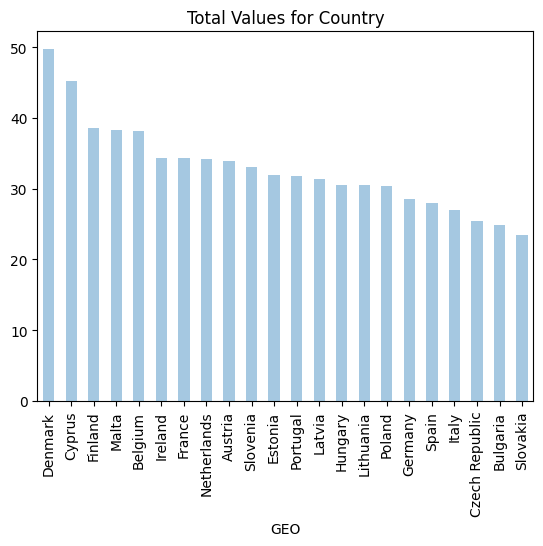

In [40]:
totalSum = piv_edu.sum(axis=1).sort_values(ascending=False)
totalSum.plot(kind="bar", style="b", alpha=0.4, title="Total Values for Country")

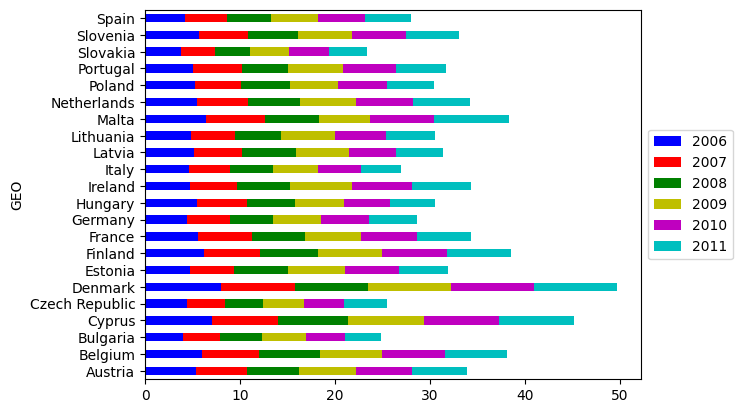

In [41]:
my_colors = ["b", "r", "g", "y", "m", "c"]
ax = piv_edu.plot(kind="barh", stacked=True, color=my_colors)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))